## About Dataset

### Dataset Name: 
Spam Email Dataset

### Description:
This dataset contains a collection of email text messages, labeled as either spam or not spam. Each email message is associated with a binary label, where "1" indicates that the email is spam, and "0" indicates that it is not spam. The dataset is intended for use in training and evaluating spam email classification models.

### Columns:
* **text (Text):** This column contains the text content of the email messages. It includes the body of the emails along with any associated subject lines or headers.
* **spam_or_not (Binary):** This column contains binary labels to indicate whether an email is spam or not. "1" represents spam, while "0" represents not spam.

### Usage:
This dataset can be used for various Natural Language Processing (NLP) tasks, such as text classification and spam detection. Researchers and data scientists can train and evaluate machine learning models using this dataset to build effective spam email filters.

In [1]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from wordcloud import WordCloud
import string
import re

In [3]:
df = pd.read_csv("C:/Users/ASUS/Desktop/Projects/Spam Email Classification/emails.csv")

In [4]:
df.sample(5)

,text,spam,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109
161,Subject: your online sales are low because you...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,"Subject: kinja account activation hello , izt...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2696,Subject: mg metals - london research responsib...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5694,Subject: new employee shirley : don ' t pani...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3876,"Subject: re : cusip vince , i am waiting to h...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(5730, 110)

Steps:
1. Data cleaning
2. EDA
3. Text preprocessing
4. Model building
5. Evaluation
6. Improvement

## Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Columns: 110 entries, text to Unnamed: 109
dtypes: float64(1), object(109)
memory usage: 4.8+ MB


In [7]:
df.columns

Index(['text', 'spam', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 100', 'Unnamed: 101', 'Unnamed: 102', 'Unnamed: 103',
       'Unnamed: 104', 'Unnamed: 105', 'Unnamed: 106', 'Unnamed: 107',
       'Unnamed: 108', 'Unnamed: 109'],
      dtype='object', length=110)

In [8]:
# Keep first 2 columns only
df.drop(columns=df.columns.difference(["text", "spam"]), inplace=True)


In [9]:
df.columns

Index(['text', 'spam'], dtype='object')

In [10]:
df.sample(5)

,text,spam
1875,Subject: uc - berkeley graduate student ashle...,0
917,"Subject: medzz services hello , welcome to ph...",1
4532,Subject: hr deadlines and action items please...,0
3174,"Subject: risk contact steve , i talked to sh...",0
1595,Subject: from the enron india newsdesk - may 4...,0


In [11]:
# Missing values
df.isnull().sum()

text    0
spam    2
dtype: int64

In [12]:
df[df["spam"].isnull()]

,text,spam
1380,Subject: from the enron india newsdesk - april...,NaN
2651,Subject: from the enron india newsdesk - april...,NaN


In [13]:
# Removing null values
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [15]:
df.shape

(5728, 2)

In [16]:
# Duplicate values
df.duplicated().sum()

np.int64(33)

In [17]:
# Removing duplicate values
df= df.drop_duplicates(keep="first")

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(5695, 2)

## EDA

In [20]:
df.sample(10)

,text,spam
4882,Subject: friday off - - - - - - - - - - - - -...,0
2306,Subject: don ' t forget - coffee colloquium th...,0
4812,Subject: video conference with the mars corp ....,0
2375,Subject: year end 2000 performance feedback n...,0
3777,"Subject: team 3 ken , it seems that there ma...",0
4829,Subject: re : hello from vince kaminski at enr...,0
4750,"Subject: re : vacation shrley , no problem ....",0
2139,Subject: your visit to sydney in july dear vi...,0
2471,Subject: re : enterprise risk management jim ...,0
644,Subject: about your application we tried to c...,1


In [21]:
df["spam"].value_counts()

spam
0                                                                                               4325
1                                                                                               1368
 its termination would not  have such a phenomenal impact on the power situation .  however        1
 mr suresh prabhu                                                                                  1
Name: count, dtype: int64

In [22]:
df = df[df["spam"].isin(["0", "1"])]


In [23]:
df["spam"]=LabelEncoder().fit_transform(df["spam"])

In [24]:
df["spam"].value_counts()

spam
0    4325
1    1368
Name: count, dtype: int64

In [25]:
df.shape

(5693, 2)

([<matplotlib.patches.Wedge at 0x1e6bb327020>,
 [Text(-0.8011671487152496, 0.7537447842734816, 'Ham'),
  Text(0.8011670349029446, -0.7537449052463467, 'Spam')],
 [Text(-0.43700026293559063, 0.4111335186946263, '75.97'),
  Text(0.43700020085615154, -0.41113358467982547, '24.03')])

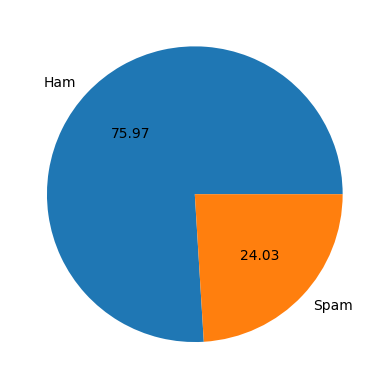

In [26]:
plt.pie(df["spam"].value_counts(), labels=["Ham","Spam"], autopct="%0.2f")

Data is imbalanced

In [27]:
nltk.download("punkt")
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
df.sample(5)

,text,spam
5569,Subject: request submitted : access request fo...,0
1160,Subject: your in - home source of health infor...,1
3788,Subject: fwd : eprm article return - path : ...,0
918,Subject: save your money buy getting this thin...,1
4584,"Subject: new resume dear vince , i am so gra...",0


In [29]:
df["no_of_characters"]=df["text"].apply(len)

In [30]:
df.sample(5)

,text,spam,no_of_characters
2446,Subject: re : it was nice meeting you at the i...,0,3166
3548,"Subject: congratulations your majesty , cong...",0,329
4107,Subject: reviewer approval please note that y...,0,559
330,Subject: software taking a bite out of your bu...,1,202
3872,Subject: re : visit to houston and vince kamin...,0,2596


In [31]:
df["no_of_words"]= df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
df.sample(5)

,text,spam,no_of_characters,no_of_words
4506,Subject: presentation to dave delainey good m...,0,345,70
4609,Subject: greg ball interview shirley : could...,0,1109,274
4271,Subject: hurricane warning derivatives folks ...,0,3453,595
747,Subject: returned mail : see transcript for de...,1,421,107
1669,"Subject: re : merit increases vince , i am g...",0,1010,209


In [33]:
df["no_of_sentences"]= df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df.sample(5)

,text,spam,no_of_characters,no_of_words,no_of_sentences
4437,"Subject: re : henwood query hi karolina , ye...",0,3597,723,29
1479,Subject: enron open positions dear mr . kamin...,0,7690,1305,92
4992,Subject: re : baylor - enron case study cindy...,0,475,108,7
4976,Subject: re : template for a proposal mark & ...,0,525,100,4
1728,Subject: 2000 chairman ' s award everyday her...,0,1718,328,16


In [35]:
df[["no_of_characters","no_of_words","no_of_sentences"]].describe()

,no_of_characters,no_of_words,no_of_sentences
count,5693.000000,5693.000000,5693.000000
mean,1543.176357,325.370455,19.359213
std,1886.930449,391.332918,35.563051
min,13.000000,3.000000,1.000000
25%,508.000000,102.000000,7.000000
50%,979.000000,211.000000,12.000000
75%,1891.000000,402.000000,22.000000
max,31055.000000,6350.000000,1565.000000


In [36]:
# Ham
df[df["spam"]==0][["no_of_characters","no_of_words","no_of_sentences"]].describe()

,no_of_characters,no_of_words,no_of_sentences
count,4325.000000,4325.000000,4325.000000
mean,1614.634682,343.549595,19.702428
std,1742.033484,368.421291,37.605817
min,13.000000,3.000000,1.000000
25%,577.000000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.000000,440.000000,22.000000
max,31055.000000,6350.000000,1565.000000


In [37]:
# Spam
df[df["spam"]==1][["no_of_characters","no_of_words","no_of_sentences"]].describe()

,no_of_characters,no_of_words,no_of_sentences
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


Text(0.5, 1.0, 'Histogram of Number of Characters')

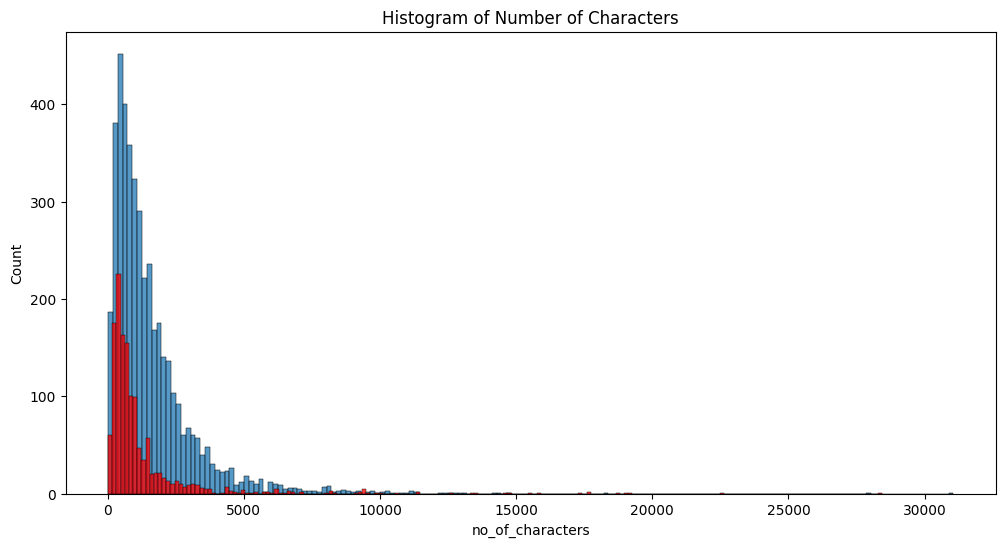

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["spam"]==0]["no_of_characters"])
sns.histplot(df[df["spam"]==1]["no_of_characters"],color="red")
plt.title("Histogram of Number of Characters")

* Both Spam and Ham distributions for Number of Characters are positively-skewed.
* In the short–medium range, ham and spam overlap heavily.
* So no_of_characters alone cannot classify spam emails.

Text(0.5, 1.0, 'Histogram of Number of Words')

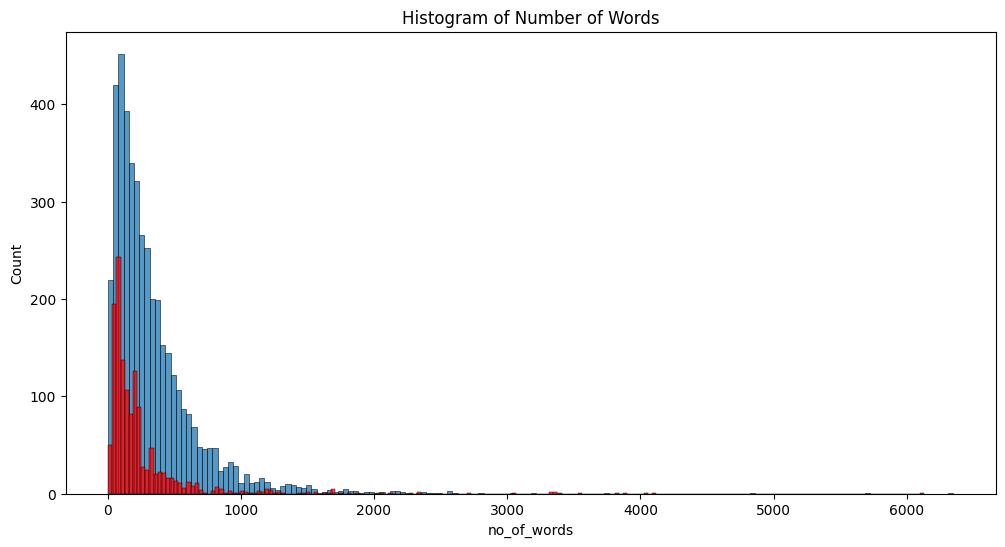

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["spam"]==0]["no_of_words"])
sns.histplot(df[df["spam"]==1]["no_of_words"],color="red")
plt.title("Histogram of Number of Words")

* Both Spam and Ham distributions for Number of Words are positively-skewed.
* In the short–medium range, ham and spam overlap heavily.
* So no_of_words alone cannot classify spam emails.

Text(0.5, 1.0, 'Histogram of Number of Sentences')

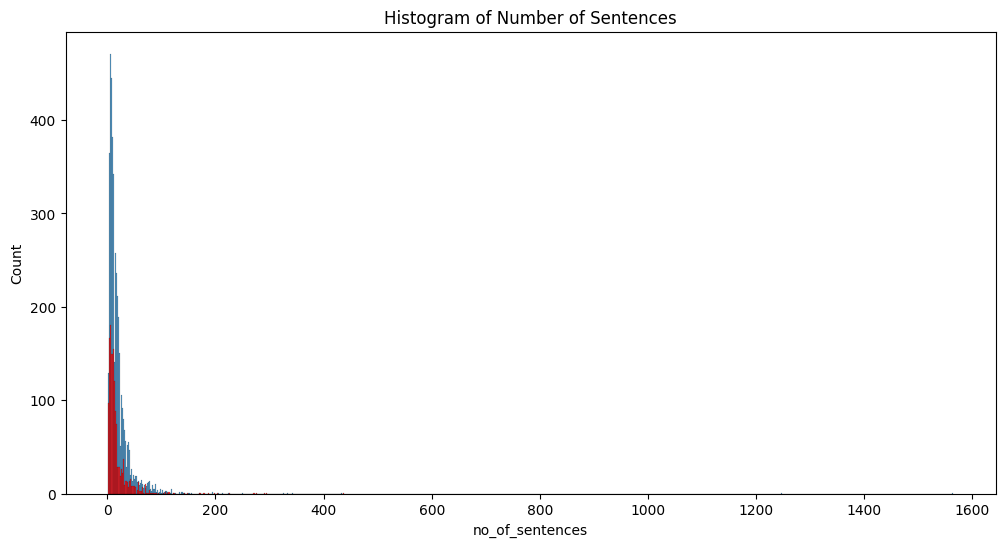

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["spam"]==0]["no_of_sentences"])
sns.histplot(df[df["spam"]==1]["no_of_sentences"],color="red")
plt.title("Histogram of Number of Sentences")

* Both Spam and Ham distributions for Number of Sentences are positively-skewed.
* In the short–medium range, ham and spam overlap heavily.
* So no_of_sentences alone cannot classify spam emails.

Text(0.5, 1.02, 'Pairplot of Email Features by Class')

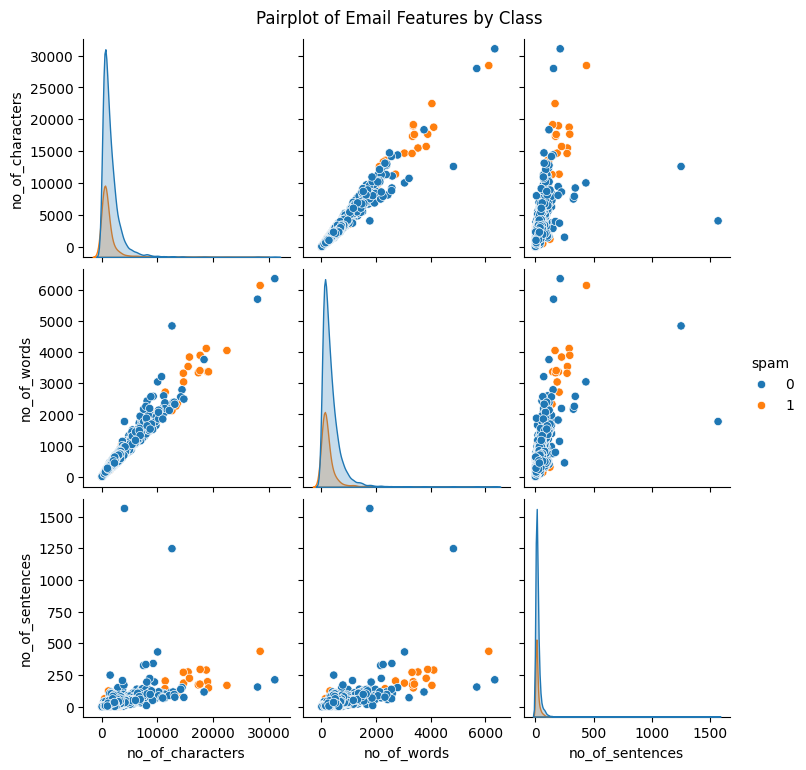

In [41]:
pair = sns.pairplot(df, hue="spam")
pair.figure.suptitle("Pairplot of Email Features by Class", y=1.02)

The pairplot shows strong linear dependence between character and word counts, indicating redundancy among length-based features. Spam emails are generally shorter, while long emails are predominantly ham. However, significant overlap exists in the lower ranges, suggesting that length features alone are insufficient for accurate classification

Text(0.5, 1.0, 'Correlation Plot')

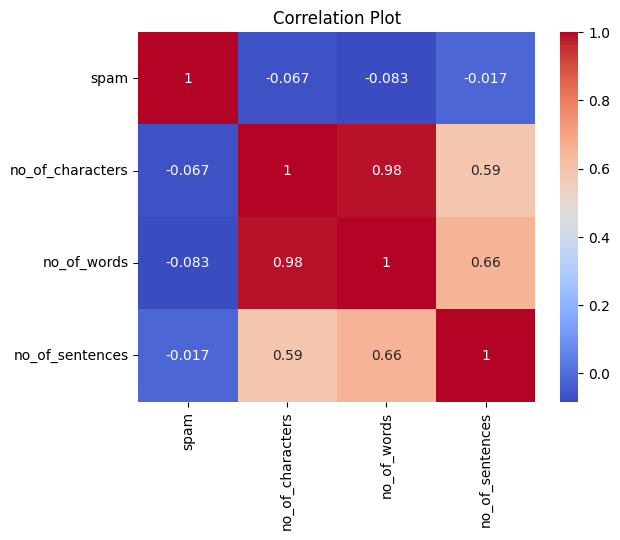

In [42]:
cor = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
cor.set_title("Correlation Plot")

Almost no linear relationship exists between length of emails and whether the email is spam or not.

## Text Preprocessing

* Converting to lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [43]:
ps=PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
def transform_text(text):
    
    text = re.sub(r'^\s*subject\s*:\s*', '', text, flags=re.IGNORECASE)
    
    text= text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
             y.append(i)
         
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)    # .join(y) joins all elements of y using a space in between

In [45]:
df["transformed_text"]= df["text"].apply(transform_text)

In [46]:
df.sample(5)

,text,spam,no_of_characters,no_of_words,no_of_sentences,transformed_text
2459,Subject: re : re [ 10 ] : greetings from londo...,0,7371,1683,132,10 greet london enron teresa would like invit ...
5024,Subject: fw : application for open positions w...,0,6489,1360,107,fw applic open posit within enron dear mr kami...
4825,Subject: wallet size telephone cards for the r...,0,355,76,7,wallet size telephon card research group hi de...
5656,Subject: yvan chaxel your name was listed by ...,0,179,32,2,yvan chaxel name list yvan refer applic gradua...
603,Subject: [ ilug ] manuel oko attn : sir / mad...,1,2550,487,28,ilug manuel oko attn sir madan strictli confid...


In [47]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [48]:
spam_wc=wc.generate(df[df["spam"]==1]["transformed_text"].str.cat(sep=" "))
ham_wc=wc.generate(df[df["spam"]==0]["transformed_text"].str.cat(sep=" "))

Text(0.5, 1.0, 'Spam WordCloud')

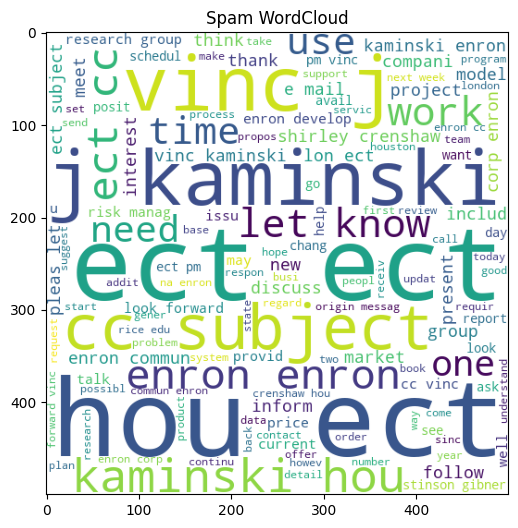

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title("Spam WordCloud")

Text(0.5, 1.0, 'Ham WordCloud')

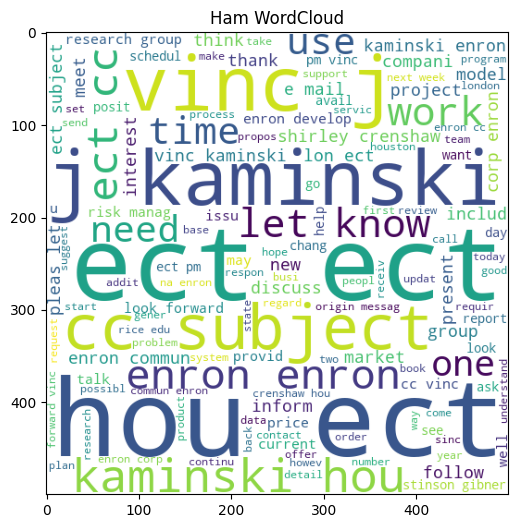

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.title("Ham WordCloud")

In [51]:
spam_corpus=[]
for email in df[df["spam"]==1]["transformed_text"].tolist():
    for word in email.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

173262

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18700\3611946926.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spam_df, x="word", y="frequency",palette="coolwarm")


Text(0.5, 1.0, 'Top 30 Most Frequent Words in Spam Emails')

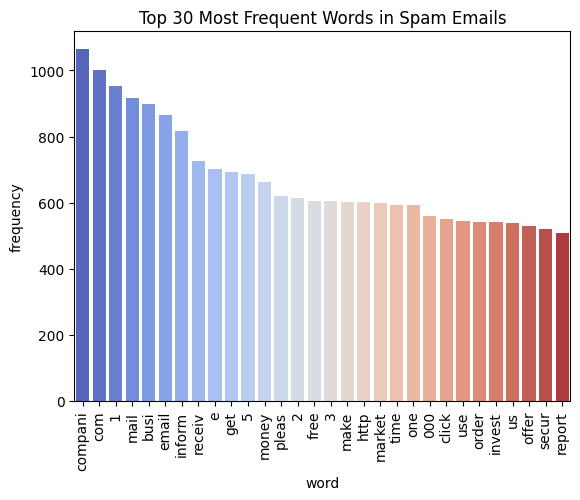

In [53]:
spam_df = pd.DataFrame(
    Counter(spam_corpus).most_common(30),
    columns=["word", "frequency"]
)
sns.barplot(data=spam_df, x="word", y="frequency",palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 30 Most Frequent Words in Spam Emails")

In [54]:
ham_corpus=[]
for email in df[df["spam"]==0]["transformed_text"].tolist():
    for word in email.split():
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

690107

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18700\9621742.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ham_df, x="word", y="frequency",palette="coolwarm")


Text(0.5, 1.0, 'Top 30 Most Frequent Words in Ham Emails')

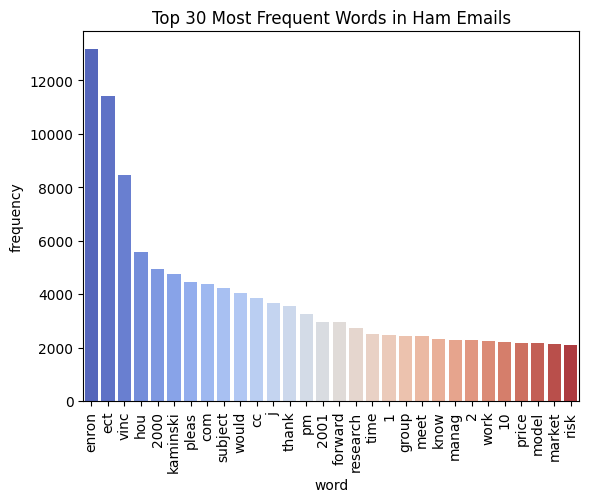

In [56]:
ham_df = pd.DataFrame(
    Counter(ham_corpus).most_common(30),
    columns=["word", "frequency"]
)
sns.barplot(data=ham_df, x="word", y="frequency",palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 30 Most Frequent Words in Ham Emails")

In [57]:
df.sample(5)

,text,spam,no_of_characters,no_of_words,no_of_sentences,transformed_text
3295,"Subject: vince , i ' ve been out of the offic...",0,726,158,11,vinc offic last day discuss friday veronica ho...
5532,Subject: re : new color printer monday will b...,0,1094,321,11,new color printer monday perfect locat ebl 944...
3395,"Subject: a "" bit "" of history on the fourth of...",0,274,56,5,bit histori fourth juli hello everyon vinc ask...
1066,Subject: save your money by getting an oem sof...,1,165,36,6,save money get oem softwar need softwar pc vis...
3686,Subject: projects completed and work in progre...,0,1133,229,14,project complet work progress dear vinc hi hop...


## Model Building & Evaluation

Text Vectorization is being done using TfIdf. 

TF-IDF is being used to transform email text into meaningful numerical features by emphasizing discriminative words while reducing the influence of common terms, making it well suited for spam email classification.

In [58]:
tfidf= TfidfVectorizer(max_features=3000)

In [59]:
X= tfidf.fit_transform(df["transformed_text"]).toarray()

In [60]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [61]:
X.shape

(5693, 3000)

In [62]:
df.head()

,text,spam,no_of_characters,no_of_words,no_of_sentences,transformed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,natur irresist corpor ident lt realli hard rec...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,stock trade gunsling fanni merril muzo colza a...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,unbeliev new home made easi im want show homeo...
3,Subject: 4 color printing special request add...,1,500,99,5,4 color print special request addit inform cli...
4,"Subject: do not have money , get software cds ...",1,235,53,9,money get softwar cd softwar compat great grow...


In [63]:
y=df["spam"].values

In [64]:
y

array([1, 1, 1, ..., 0, 0, 0], shape=(5693,))

In [65]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=444)

In [66]:
skf = StratifiedKFold(
    n_splits=4,
    shuffle=True,
    random_state=444
)

In [67]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
cnb=ComplementNB()

In [68]:
# Gaussian Naive Bayes
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]     # Portion of the largest variance of all features that is added to variances for calculation stability.
}

gs_gnb = GridSearchCV(gnb, param_grid_gnb, cv=skf, scoring='precision', n_jobs=-1)
gs_gnb.fit(X_train, y_train)

print("GaussianNB Best Parameters:", gs_gnb.best_params_)
print("GaussianNB Best Score:", gs_gnb.best_score_)

y_pred_gnb = gs_gnb.predict(X_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_gnb))
print("GaussianNB Precision:", precision_score(y_test, y_pred_gnb))

GaussianNB Best Parameters: {'var_smoothing': 1e-05}
GaussianNB Best Score: 0.970768994198368
GaussianNB Accuracy: 0.9736611062335382
Confusion Matrix:
 [[883   5]
 [ 25 226]]
GaussianNB Precision: 0.9783549783549783


In [69]:
# Multinomial Naive Bayes
param_grid_mnb = {
    'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
    'fit_prior': [True, False]
}

gs_mnb = GridSearchCV(mnb, param_grid_mnb, cv=skf, scoring='precision', n_jobs=-1)
gs_mnb.fit(X_train, y_train)

print("MultinomialNB Best Parameters:", gs_mnb.best_params_)
print("MultinomialNB Best Score:", gs_mnb.best_score_)

y_pred_mnb = gs_mnb.predict(X_test)
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_mnb))
print("MultinomialNB Precision:", precision_score(y_test, y_pred_mnb))

MultinomialNB Best Parameters: {'alpha': 1e-07, 'fit_prior': True}
MultinomialNB Best Score: 0.9858210698026701
MultinomialNB Accuracy: 0.9894644424934153
Confusion Matrix:
 [[886   2]
 [ 10 241]]
MultinomialNB Precision: 0.9917695473251029


In [70]:
# Bernoulli Naive Bayes
param_grid_bnb = {
    'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
    'binarize': [0.0, 0.5, 1.0],
    'fit_prior': [True, False]
}

gs_bnb = GridSearchCV(bnb, param_grid_bnb, cv=skf, scoring='precision', n_jobs=-1)
gs_bnb.fit(X_train, y_train)

print("BernoulliNB Best Parameters:", gs_bnb.best_params_)
print("BernoulliNB Best Score:", gs_bnb.best_score_)

y_pred_bnb = gs_bnb.predict(X_test)
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_bnb))
print("BernoulliNB Precision:", precision_score(y_test, y_pred_bnb))

BernoulliNB Best Parameters: {'alpha': 0.001, 'binarize': 0.5, 'fit_prior': True}
BernoulliNB Best Score: 0.9496180168139836
BernoulliNB Accuracy: 0.9543459174714662
Confusion Matrix:
 [[877  11]
 [ 41 210]]
BernoulliNB Precision: 0.9502262443438914


In [71]:
# Complement Naive Bayes
param_grid_cnb = {
    'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
    'fit_prior': [True, False]
}

gs_cnb = GridSearchCV(cnb, param_grid_cnb, cv=skf, scoring='precision', n_jobs=-1)
gs_cnb.fit(X_train, y_train)

print("ComplementNB Best Parameters:", gs_cnb.best_params_)
print("ComplementNB Best Score:", gs_cnb.best_score_)

y_pred_cnb = gs_cnb.predict(X_test)
print("ComplementNB Accuracy:", accuracy_score(y_test, y_pred_cnb))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_cnb))
print("ComplementNB Precision:", precision_score(y_test, y_pred_cnb))

# The Complement Naive Bayes classifier was designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier. It is particularly suited for imbalanced data sets.

ComplementNB Best Parameters: {'alpha': 1e-07, 'fit_prior': True}
ComplementNB Best Score: 0.9814113779904358
ComplementNB Accuracy: 0.9929762949956101
Confusion Matrix:
 [[885   3]
 [  5 246]]
ComplementNB Precision: 0.9879518072289156


Precision is highest for Multinomial NB

In [72]:
svc=SVC(kernel="sigmoid")
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
lrc=LogisticRegression()
rfc=RandomForestClassifier(random_state=444)
abc=AdaBoostClassifier(random_state=444)
bc=BaggingClassifier(random_state=444)
etc=ExtraTreesClassifier(random_state=444)
gbdt=GradientBoostingClassifier(random_state=444)
xgb=XGBClassifier(random_state=444)

In [73]:
results=[]
confusion_matrices={}

In [74]:
# Multinomial NB
param_grid_mnb = {
    'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],   # Additive (Laplace/Lidstone) smoothing parameter (set alpha=0 and force_alpha=True, for no smoothing)
    'fit_prior': [True, False]     # Whether to learn class prior probabilities or not. If false, a uniform prior will be used.
}

gs_mnb = GridSearchCV(mnb, param_grid_mnb, cv=skf, scoring='precision', n_jobs=-1,verbose=1)
gs_mnb.fit(X_train, y_train)
y_pred_mnb = gs_mnb.predict(X_test)
cm_mnb=confusion_matrix(y_test,y_pred_mnb)
confusion_matrices["MNB"]= cm_mnb
results.append(["MNB", gs_mnb.best_params_, gs_mnb.best_score_,
                accuracy_score(y_test,y_pred_mnb), precision_score(y_test, y_pred_mnb), f1_score(y_test, y_pred_mnb)
])

Fitting 4 folds for each of 14 candidates, totalling 56 fits


In [75]:
# SVC
param_grid_svc={
    "C": [0.1,1,10],
    "gamma": ["scale","auto"]
}
gs_svc=GridSearchCV(svc, param_grid_svc, cv=skf, scoring="precision", n_jobs=-1, verbose=1)
gs_svc.fit(X_train,y_train)
y_pred_svc=gs_svc.predict(X_test)
cm_svc=confusion_matrix(y_test, y_pred_svc)
confusion_matrices["SVC"]= cm_svc
results.append(["SVC",gs_svc.best_params_,gs_svc.best_score_,
                accuracy_score(y_test,y_pred_svc), precision_score(y_test, y_pred_svc), f1_score(y_test, y_pred_svc)
])

Fitting 4 folds for each of 6 candidates, totalling 24 fits


In [76]:
# KNeighborsClassifier
param_grid_knc= {
    "n_neighbors": [3,4,5,6,7],
    "weights": ["uniform","distance"],
    "metric":["euclidean","cosine"]
}
gs_knc=GridSearchCV(knc, param_grid_knc, cv=skf, scoring="precision", n_jobs=-1, verbose=1)
gs_knc.fit(X_train, y_train)
y_pred_knc= gs_knc.predict(X_test)
cm_knc= confusion_matrix(y_test,y_pred_knc)
confusion_matrices["KNN"]=cm_knc
results.append(["KNN", gs_knc.best_params_, gs_knc.best_score_,
                accuracy_score(y_test, y_pred_knc), precision_score(y_test, y_pred_knc), f1_score(y_test, y_pred_knc)
])

Fitting 4 folds for each of 20 candidates, totalling 80 fits


In [77]:
# DecisionTreeClassifier
param_grid_dtc={
    "max_depth":[10,20,30,None],    # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    "min_samples_split":[2,5,10],    # The minimum number of samples required to split an internal node
}
gs_dtc = GridSearchCV(dtc, param_grid_dtc, cv=skf, scoring="precision", n_jobs=-1, verbose=1)
gs_dtc.fit(X_train, y_train)
y_pred_dtc = gs_dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
confusion_matrices["DecisionTree"] = cm_dtc
results.append(["DecisionTree", gs_dtc.best_params_, gs_dtc.best_score_, 
                accuracy_score(y_test, y_pred_dtc), precision_score(y_test, y_pred_dtc), f1_score(y_test, y_pred_dtc)
])

Fitting 4 folds for each of 12 candidates, totalling 48 fits


In [78]:
# LogisticRegression
param_grid_lrc={
    "C":[0.01, 0.1, 1, 10],   # Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
    "penalty":["l2"],
    "solver":["liblinear"]  # Algorithm to use in the optimization problem.
}
gs_lrc = GridSearchCV(lrc, param_grid_lrc, cv=skf, scoring="precision", n_jobs=-1, verbose=1)
gs_lrc.fit(X_train, y_train)
y_pred_lrc = gs_lrc.predict(X_test)
cm_lrc = confusion_matrix(y_test, y_pred_lrc)
confusion_matrices["LogisticRegression"] = cm_lrc
results.append(["LogisticRegression", gs_lrc.best_params_, gs_lrc.best_score_, 
                accuracy_score(y_test, y_pred_lrc), precision_score(y_test, y_pred_lrc), f1_score(y_test, y_pred_lrc)
])


Fitting 4 folds for each of 4 candidates, totalling 16 fits


In [79]:
# RandomForestClassifier
param_grid_rfc={
    "n_estimators":[50,100,200],     # The number of trees in the forest.
    "max_depth":[10,20,None],      # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    "min_samples_split":[2,5],    # The minimum number of samples required to split an internal node
    "max_features": ["sqrt","log2"]   # The number of features to consider when looking for the best split
}
gs_rfc = GridSearchCV(rfc, param_grid_rfc, cv=skf, scoring="precision", n_jobs=-1, verbose=1)
gs_rfc.fit(X_train, y_train)
y_pred_rfc = gs_rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
confusion_matrices["RandomForest"] = cm_rfc
results.append(["RandomForest", gs_rfc.best_params_, gs_rfc.best_score_, 
                accuracy_score(y_test, y_pred_rfc), precision_score(y_test, y_pred_rfc), f1_score(y_test, y_pred_rfc)
])


Fitting 4 folds for each of 36 candidates, totalling 144 fits


In [80]:
# AdaBoostClassifier
param_grid_abc={
    "n_estimators":[50,100,200],   # The maximum number of estimators at which boosting is terminated. 
    "learning_rate":[0.01,0.1,1.0]    # Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the learning_rate and n_estimators parameters.
}
gs_abc = GridSearchCV(abc, param_grid_abc, cv=skf, scoring='precision', n_jobs=-1, verbose=1)
gs_abc.fit(X_train, y_train)
y_pred_abc = gs_abc.predict(X_test)
cm_abc = confusion_matrix(y_test, y_pred_abc)
confusion_matrices["AdaBoost"] = cm_abc
results.append(["AdaBoost", gs_abc.best_params_, gs_abc.best_score_, 
                accuracy_score(y_test, y_pred_abc), precision_score(y_test, y_pred_abc), f1_score(y_test, y_pred_abc)
])

Fitting 4 folds for each of 9 candidates, totalling 36 fits


In [81]:
# BaggingClassifier
param_grid_bc={
    "n_estimators": [10,50,100],   # The number of base estimators in the ensemble.
    "max_samples": [0.5,0.7,1.0]   # The number of samples to draw from X to train each base estimator (with replacement by default
}
gs_bc = GridSearchCV(bc, param_grid_bc, cv=skf, scoring="precision", n_jobs=-1, verbose=1)
gs_bc.fit(X_train, y_train)
y_pred_bc = gs_bc.predict(X_test)
cm_bc = confusion_matrix(y_test, y_pred_bc)
confusion_matrices['Bagging'] = cm_bc
results.append(['Bagging', gs_bc.best_params_, gs_bc.best_score_, 
                accuracy_score(y_test, y_pred_bc), precision_score(y_test, y_pred_bc), f1_score(y_test, y_pred_bc)
])

Fitting 4 folds for each of 9 candidates, totalling 36 fits


In [82]:
# ExtraTreesClassifier
param_grid_etc = {
    'n_estimators': [50, 100, 200],   # The number of trees in the forest.
    'max_depth': [10, 20, None],    # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    'min_samples_split': [2, 5],   # The minimum number of samples required to split an internal node
    'max_features': ['sqrt','log2']   # The number of features to consider when looking for the best split
}
gs_etc = GridSearchCV(etc, param_grid_etc, cv=skf, scoring='precision', n_jobs=-1, verbose=1)
gs_etc.fit(X_train, y_train)
y_pred_etc = gs_etc.predict(X_test)
cm_etc = confusion_matrix(y_test, y_pred_etc)
confusion_matrices['ExtraTrees'] = cm_etc
results.append(['ExtraTrees', gs_etc.best_params_, gs_etc.best_score_, 
                accuracy_score(y_test, y_pred_etc), precision_score(y_test, y_pred_etc), f1_score(y_test, y_pred_etc)
])


Fitting 4 folds for each of 36 candidates, totalling 144 fits


In [83]:
# GradientBoostingClassifier
param_grid_gbdt = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gs_gbdt = GridSearchCV(gbdt, param_grid_gbdt, cv=skf, scoring='precision', n_jobs=-1, verbose=1)
gs_gbdt.fit(X_train, y_train)
y_pred_gbdt = gs_gbdt.predict(X_test)
cm_gbdt = confusion_matrix(y_test, y_pred_gbdt)
confusion_matrices['GradientBoosting'] = cm_gbdt
results.append(['GradientBoosting', gs_gbdt.best_params_, gs_gbdt.best_score_, 
                accuracy_score(y_test, y_pred_gbdt), precision_score(y_test, y_pred_gbdt), f1_score(y_test, y_pred_gbdt)
])

Fitting 4 folds for each of 27 candidates, totalling 108 fits


In [84]:
# XGBClassifier
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}
gs_xgb = GridSearchCV(xgb, param_grid_xgb, cv=skf, scoring='precision', n_jobs=-1, verbose=1)
gs_xgb.fit(X_train, y_train)
y_pred_xgb = gs_xgb.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
confusion_matrices['XGBoost'] = cm_xgb
results.append(['XGBoost', gs_xgb.best_params_, gs_xgb.best_score_, 
                accuracy_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_xgb)])


Fitting 4 folds for each of 27 candidates, totalling 108 fits


In [85]:
results_df = pd.DataFrame(results, columns=['Model', 'Best Params', 'CV Score', 
                                             'Test Accuracy', 'Test Precision', 'F1 Score'])
print(results_df.to_string())

                 Model                                                                            Best Params  CV Score  Test Accuracy  Test Precision  F1 Score
0                  MNB                                                    {'alpha': 1e-07, 'fit_prior': True}  0.985821       0.989464        0.991770  0.975709
1                  SVC                                                             {'C': 10, 'gamma': 'auto'}  1.000000       0.812994        1.000000  0.262976
2                  KNN                        {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}  1.000000       0.899912        1.000000  0.706186
3         DecisionTree                                            {'max_depth': None, 'min_samples_split': 2}  0.925377       0.952590        0.886275  0.893281
4   LogisticRegression                                    {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}  1.000000       0.856014        1.000000  0.514793
5         RandomForest  {'max_dept

In [86]:
for model_name, cm in confusion_matrices.items():
    print(f"\n{model_name}:")
    print(cm)
    tn, fp, fn, tp = cm.ravel()  # Flatten the array into one dimension.
    print(f"True Negatives: {tn}, False Positives: {fp}")
    print(f"False Negatives: {fn}, True Positives: {tp}")


MNB:
[[886   2]
 [ 10 241]]
True Negatives: 886, False Positives: 2
False Negatives: 10, True Positives: 241

SVC:
[[888   0]
 [213  38]]
True Negatives: 888, False Positives: 0
False Negatives: 213, True Positives: 38

KNN:
[[888   0]
 [114 137]]
True Negatives: 888, False Positives: 0
False Negatives: 114, True Positives: 137

DecisionTree:
[[859  29]
 [ 25 226]]
True Negatives: 859, False Positives: 29
False Negatives: 25, True Positives: 226

LogisticRegression:
[[888   0]
 [164  87]]
True Negatives: 888, False Positives: 0
False Negatives: 164, True Positives: 87

RandomForest:
[[888   0]
 [178  73]]
True Negatives: 888, False Positives: 0
False Negatives: 178, True Positives: 73

AdaBoost:
[[869  19]
 [  7 244]]
True Negatives: 869, False Positives: 19
False Negatives: 7, True Positives: 244

Bagging:
[[870  18]
 [  9 242]]
True Negatives: 870, False Positives: 18
False Negatives: 9, True Positives: 242

ExtraTrees:
[[888   0]
 [172  79]]
True Negatives: 888, False Positives: 0


In [87]:
results_df_melt= pd.melt(results_df.drop(columns=["Best Params","CV Score"]), id_vars="Model")

In [88]:
results_df_melt

,Model,variable,value
0,MNB,Test Accuracy,0.989464
1,SVC,Test Accuracy,0.812994
2,KNN,Test Accuracy,0.899912
3,DecisionTree,Test Accuracy,0.952590
4,LogisticRegression,Test Accuracy,0.856014
5,RandomForest,Test Accuracy,0.843723
6,AdaBoost,Test Accuracy,0.977173
7,Bagging,Test Accuracy,0.976295
8,ExtraTrees,Test Accuracy,0.848990
9,GradientBoosting,Test Accuracy,0.981563


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'MNB'),
  Text(1, 0, 'SVC'),
  Text(2, 0, 'KNN'),
  Text(3, 0, 'DecisionTree'),
  Text(4, 0, 'LogisticRegression'),
  Text(5, 0, 'RandomForest'),
  Text(6, 0, 'AdaBoost'),
  Text(7, 0, 'Bagging'),
  Text(8, 0, 'ExtraTrees'),
  Text(9, 0, 'GradientBoosting'),
  Text(10, 0, 'XGBoost')])

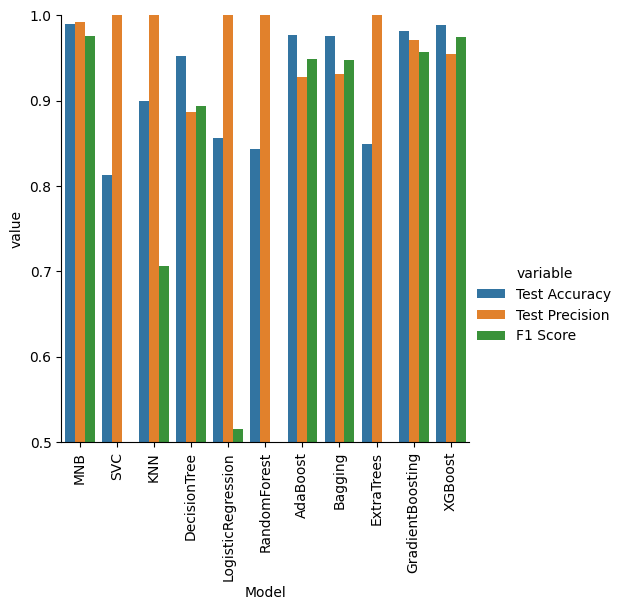

In [89]:
sns.catplot(x="Model",y="value",
            hue="variable",data=results_df_melt, kind="bar")
plt.ylim(0.5,1.0)
plt.xticks(rotation="vertical")

SVC, KNN, Logistic Regression, Random Forest, Extra Trees have perfect Precision values but have very low F-1 score which demonstrates poor recall and fail to identify a large proportion of spam emails.
Multinomial Naive Bayes, Gradient Boosting and XGBoost achieve a better balance between precision and recall, making them more suitable for this task.

In [90]:
# Voting Classifier
voting=VotingClassifier(estimators=[("MNB",mnb),("GradientBoosting",gbdt),("AdaBoost",abc)],voting="soft")

In [91]:
voting.fit(X_train,y_train)

,estimators,"[('MNB', ...), ('GradientBoosting', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None
,loss,'log_loss'


In [92]:
y_pred_voting= voting.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_voting))
print("Precision: ",precision_score(y_test,y_pred_voting))
print("F1 Score: ", f1_score(y_test,y_pred_voting))

Accuracy:  0.9885864793678666
Precision:  0.9722222222222222
F1 Score:  0.974155069582505


In [93]:
# Stacking
estimators=[("MNB",mnb),("GradientBoosting",gbdt),("AdaBoost",abc)]
final_estimator= RandomForestClassifier(random_state=444)

In [94]:
sc=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [95]:
sc.fit(X_train,y_train)

,estimators,"[('MNB', ...), ('GradientBoosting', ...), ...]"
,final_estimator,RandomForestC...dom_state=444)
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [96]:
y_pred_sc=sc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_sc))
print("Precision: ",precision_score(y_test,y_pred_sc))
print("F1 Score: ", f1_score(y_test,y_pred_sc))

Accuracy:  0.9885864793678666
Precision:  0.9722222222222222
F1 Score:  0.974155069582505


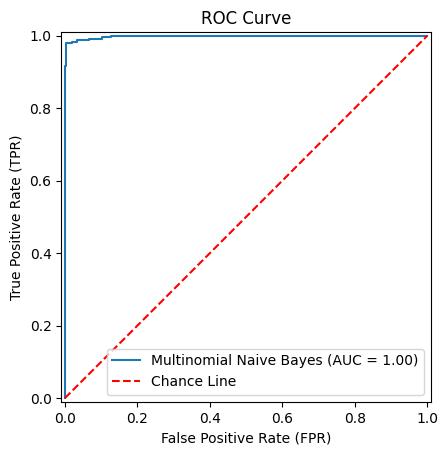

In [108]:
best_mnb = gs_mnb.best_estimator_

# Plotting ROC curve for the best model chosen
RocCurveDisplay.from_estimator(
    best_mnb,
    X_test,
    y_test,
    name="Multinomial Naive Bayes"
)

# Adding baseline (chance line)
plt.plot([0, 1], [0, 1], 'r--', label="Chance Line")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(False)


The ROC curve lies very close to the top-left corner, and the AUC value of 1.00 indicates that the Multinomial Naive Bayes model has excellent discriminative ability. This means the model can almost perfectly distinguish between spam and ham emails across different classification thresholds. The ROC curve staying well above the red dashed chance line confirms that the model performs far better than random guessing. Overall, this result demonstrates that the classifier effectively ranks spam emails higher than legitimate emails, making it a strong and reliable model for spam email classification.


## Final Conclusion

Since misclassifying legitimate emails as spam is more costly than allowing some spam emails into the inbox, precision is prioritised in this task. Multinomial Naive Bayes achieves the highest precision (0.9918) while also maintaining strong test accuracy (0.9858) and F1 score (0.9757), making it the most suitable model for this spam email classification problem.

The current approach relies on TF-IDF features and Multinomial Naive Bayes. TF-IDF ignores word order and semantic context, which means it cannot capture meaning conveyed through phrases, sarcasm, or sentence structure. The model relies on a fixed vocabulary learned during training and may struggle to adapt to evolving spam strategies and newly emerging terms (concept drift) and also it will not generalize to other languages. Multinomial Naive Bayes assumes conditional independence between words, which is often violated in natural language and may limit performance on more complex email patterns.

Future work can explore additional models, broader hyperparameter tuning, deep learning approaches, alternative word embeddings, class imbalance handling techniques like SMOTE and cost-sensitive and adaptive learning strategies to improve robustness and generalization.